In [1]:
import requests, json
from pprint import pprint
import pandas as pd
import numpy as np

In [2]:
# get data from FPL API
FPL_Data=requests.get('https://fantasy.premierleague.com/api/bootstrap-static/').json()

# show the fields
pprint(FPL_Data, indent=2, depth=1, compact=True)

{ 'element_stats': [...],
  'element_types': [...],
  'elements': [...],
  'events': [...],
  'game_settings': {...},
  'phases': [...],
  'teams': [...],
  'total_players': 7586799}


In [3]:
# get players info from 'elements' field
players = pd.json_normalize(FPL_Data['elements'])

players.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,80201,-1,1,-1,1,0,1,1.0,...,428,44,205,13,NaN,,NaN,,NaN,
1,75.0,0.0,115918,0,0,0,0,0,1,-0.4,...,258,10,329,30,NaN,,NaN,,NaN,
2,50.0,50.0,47431,0,0,-1,1,0,3,-0.2,...,552,230,555,231,4.0,,2.0,,NaN,
3,100.0,50.0,54694,0,0,-1,1,0,4,0.0,...,114,27,240,32,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,0,0,0,2,0.0,...,319,126,197,68,NaN,,5.0,,NaN,


In [4]:
# get teams info from 'teams' field
teams = pd.json_normalize(FPL_Data['teams'])

teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1200,1250,1130,1150,1220,1210,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1100,1160,1120,1140,1080,1100,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,...,None,False,0,1010,1020,1020,1030,1020,1030,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,...,None,False,0,1100,1130,1150,1190,1100,1130,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,...,None,False,0,1060,1070,1040,1090,1040,1080,43


In [5]:
# add teams to players
complete_fpl = pd.merge(
    left=players,
    right=teams,
    left_on='team',
    right_on='id'
)
# show result
complete_fpl[['first_name', 'second_name', 'name']]

,first_name,second_name,name
0,Bernd,Leno,Arsenal
1,Rúnar Alex,Rúnarsson,Arsenal
2,Willian,Borges Da Silva,Arsenal
3,Pierre-Emerick,Aubameyang,Arsenal
4,Cédric,Soares,Arsenal
...,...,...,...
561,José,Malheiro de Sá,Wolves
562,Patrick,Cutrone,Wolves
563,Luke,Cundle,Wolves
564,Chem,Campbell,Wolves


In [6]:
# get position info from 'element_types' field
positions = pd.json_normalize(FPL_Data['element_types'])

positions.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],60
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],194
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],236
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],76


In [7]:
# add position to players
complete_fpl = complete_fpl.merge(
    positions,
    left_on='element_type',
    right_on='id'
)
# rename columns
complete_fpl=complete_fpl.rename(
columns={'name':'team_name', 'singular_name':'position_name'})

# show result 
complete_fpl[
    ['first_name', 'second_name', 'team_name', 'position_name']
]

,first_name,second_name,team_name,position_name
0,Bernd,Leno,Arsenal,Goalkeeper
1,Rúnar Alex,Rúnarsson,Arsenal,Goalkeeper
2,Karl,Hein,Arsenal,Goalkeeper
3,Aaron,Ramsdale,Arsenal,Goalkeeper
4,Jed,Steer,Aston Villa,Goalkeeper
...,...,...,...,...
561,Max,Kilman,Wolves,Defender
562,Ki-Jana,Hoever,Wolves,Defender
563,Yerson,Mosquera Valdelamar,Wolves,Defender
564,Rayan,Ait Nouri,Wolves,Defender


In [8]:
# begin request data for previous years performance by requesting API
FPL_Data= requests.get('https://fantasy.premierleague.com/api/element-summary/1/').json()

# show API fields
pprint(FPL_Data, depth=1)

{'fixtures': [...], 'history': [...], 'history_past': [...]}


In [9]:
def get_player_history(player_id):
    '''get historical season info for a given player_id'''
    
    # request general info from FPL API
    FPL_Data = requests.get(
            'https://fantasy.premierleague.com/api/element-summary/' + str(player_id) + '/'
    ).json()
    
    # extract 'history_past' data from dataframe
    complete_fpl = pd.json_normalize(FPL_Data['history_past'])
    
    return complete_fpl


# show player #1's season history
get_player_history(1).head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,2018/19,80201,50,49,106,2835,0,0,6,42,...,0,0,0,105,5,568,807.2,0.0,0.0,80.5
1,2019/20,80201,50,48,114,2649,0,0,7,39,...,0,2,0,113,10,591,843.2,0.0,0.0,84.1
2,2020/21,80201,50,50,131,3131,0,0,11,37,...,0,0,1,86,11,625,702.2,0.0,2.0,70.3


In [10]:
# select necessary columns from players dataframe
players = players[
    ['id', 'first_name', 'second_name', 'web_name', 'team',
     'element_type', 'code']
]

# join team name to players
players = players.merge(
    teams[['id', 'name']],
    left_on='team',
    right_on='id',
    suffixes=['_player', None]
).drop(['team', 'id'], axis=1)

# join positions to players
players = players.merge(
    positions[['id', 'singular_name_short']],
    left_on='element_type',
    right_on='id'
).drop(['element_type', 'id'], axis=1)

In [11]:
# get season histories for each player
points = players['id_player'].apply(get_player_history)

points = pd.concat(complete_fpl for complete_fpl in points)

points.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,2018/19,80201,50,49,106,2835,0,0,6,42,...,0,0,0,105,5,568,807.2,0.0,0.0,80.5
1,2019/20,80201,50,48,114,2649,0,0,7,39,...,0,2,0,113,10,591,843.2,0.0,0.0,84.1
2,2020/21,80201,50,50,131,3131,0,0,11,37,...,0,0,1,86,11,625,702.2,0.0,2.0,70.3
0,2020/21,115918,45,44,1,15,0,0,0,0,...,0,0,0,2,0,8,16.6,0.0,0.0,1.7
0,2016/17,225321,40,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [12]:
# rename code on players df to align with points df
players=players.rename(
columns={'code':'element_code', 'singular_name_short': 'position'})
players.head()

,id_player,first_name,second_name,web_name,element_code,name,position
0,1,Bernd,Leno,Leno,80201,Arsenal,GKP
1,2,Rúnar Alex,Rúnarsson,Rúnarsson,115918,Arsenal,GKP
2,532,Karl,Hein,Hein,463748,Arsenal,GKP
3,559,Aaron,Ramsdale,Ramsdale,225321,Arsenal,GKP
4,28,Jed,Steer,Steer,79852,Aston Villa,GKP


In [13]:
# remove unwanted columns from players tab as I only want to add the 'web_name' column to points tab
players = players[
    ['web_name', 'element_code', 'position']
]
players.head()

,web_name,element_code,position
0,Leno,80201,GKP
1,Rúnarsson,115918,GKP
2,Hein,463748,GKP
3,Ramsdale,225321,GKP
4,Steer,79852,GKP


In [14]:
# create new 'points_1920' dataframe with just that season
points_1920 = points.loc[points['season_name']=='2019/20']

points_1920.head()

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
1,2019/20,80201,50,48,114,2649,0,0,7,39,...,0,2,0,113,10,591,843.2,0.0,0.0,84.1
2,2019/20,225321,45,44,126,3330,0,1,5,62,...,0,0,0,128,13,680,973.8,24.0,0.0,99.7
4,2019/20,79852,45,43,1,7,0,0,0,0,...,0,0,0,0,0,3,0.0,0.0,0.0,0.0
5,2019/20,98980,45,44,33,770,0,0,3,9,...,0,2,0,34,1,169,256.8,0.0,0.0,25.8
2,2019/20,131897,45,47,135,3420,0,0,9,54,...,0,0,0,117,14,754,1000.0,0.0,0.0,100.1


In [15]:
# drop players duplicates
players.drop_duplicates(subset="element_code")

,web_name,element_code,position
0,Leno,80201,GKP
1,Rúnarsson,115918,GKP
2,Hein,463748,GKP
3,Ramsdale,225321,GKP
4,Steer,79852,GKP
...,...,...,...
561,Kilman,214048,DEF
562,Hoever,441271,DEF
563,Mosquera,501837,DEF
564,Ait Nouri,448514,DEF


In [16]:
# drop points duplicates
points_1920.drop_duplicates(subset="element_code")

,season_name,element_code,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
1,2019/20,80201,50,48,114,2649,0,0,7,39,...,0,2,0,113,10,591,843.2,0.0,0.0,84.1
2,2019/20,225321,45,44,126,3330,0,1,5,62,...,0,0,0,128,13,680,973.8,24.0,0.0,99.7
4,2019/20,79852,45,43,1,7,0,0,0,0,...,0,0,0,0,0,3,0.0,0.0,0.0,0.0
5,2019/20,98980,45,44,33,770,0,0,3,9,...,0,2,0,34,1,169,256.8,0.0,0.0,25.8
2,2019/20,131897,45,47,135,3420,0,0,9,54,...,0,0,0,117,14,754,1000.0,0.0,0.0,100.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2019/20,94147,50,51,118,3420,0,0,13,40,...,0,5,0,0,7,648,556.4,68.8,0.0,62.4
1,2019/20,107613,45,47,103,2703,2,2,10,34,...,0,10,1,0,8,525,621.2,160.7,298.0,108.1
1,2019/20,114128,55,55,123,2885,2,3,11,35,...,0,4,0,0,6,537,543.6,379.2,299.0,122.4
1,2019/20,214048,40,39,5,184,0,0,0,2,...,0,0,0,0,0,24,35.2,1.2,0.0,3.7


In [17]:
# set players index so the merging dataframes align
players.set_index('element_code')

,web_name,position
element_code,,
80201,Leno,GKP
115918,Rúnarsson,GKP
463748,Hein,GKP
225321,Ramsdale,GKP
79852,Steer,GKP
...,...,...
214048,Kilman,DEF
441271,Hoever,DEF
501837,Mosquera,DEF


In [18]:
# set points index so the merging dataframes align
points_1920.set_index('element_code')

,season_name,start_cost,end_cost,total_points,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
element_code,,,,,,,,,,,,,,,,,,,,,
80201,2019/20,50,48,114,2649,0,0,7,39,0,...,0,2,0,113,10,591,843.2,0.0,0.0,84.1
225321,2019/20,45,44,126,3330,0,1,5,62,0,...,0,0,0,128,13,680,973.8,24.0,0.0,99.7
79852,2019/20,45,43,1,7,0,0,0,0,0,...,0,0,0,0,0,3,0.0,0.0,0.0,0.0
98980,2019/20,45,44,33,770,0,0,3,9,0,...,0,2,0,34,1,169,256.8,0.0,0.0,25.8
131897,2019/20,45,47,135,3420,0,0,9,54,0,...,0,0,0,117,14,754,1000.0,0.0,0.0,100.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94147,2019/20,50,51,118,3420,0,0,13,40,0,...,0,5,0,0,7,648,556.4,68.8,0.0,62.4
107613,2019/20,45,47,103,2703,2,2,10,34,0,...,0,10,1,0,8,525,621.2,160.7,298.0,108.1
114128,2019/20,55,55,123,2885,2,3,11,35,0,...,0,4,0,0,6,537,543.6,379.2,299.0,122.4


In [19]:
# join player name to points df
points_1920 = points_1920.merge(players, on='element_code')

# drop columns I don't want and sort them
points_19_20=points_1920[['web_name', 'position', 'season_name', 'total_points', 'minutes', 'assists', 'goals_scored', 'clean_sheets', 'saves']]

points_19_20.head()

,web_name,position,season_name,total_points,minutes,assists,goals_scored,clean_sheets,saves
0,Leno,GKP,2019/20,114,2649,0,0,7,113
1,Ramsdale,GKP,2019/20,126,3330,1,0,5,128
2,Steer,GKP,2019/20,1,7,0,0,0,0
3,Martínez,GKP,2019/20,33,770,0,0,3,34
4,Ryan,GKP,2019/20,135,3420,0,0,9,117


In [20]:
# rename columns to have year on them
points_1920=points_19_20.rename(
columns={'web_name':'name', 'minutes':'minutes20', 'assists':'assists20', 'goals_scored':'goals20', 'clean_sheets':'clean_sheets20', 'saves':'saves20'})

points_1920.head()

,name,position,season_name,total_points,minutes20,assists20,goals20,clean_sheets20,saves20
0,Leno,GKP,2019/20,114,2649,0,0,7,113
1,Ramsdale,GKP,2019/20,126,3330,1,0,5,128
2,Steer,GKP,2019/20,1,7,0,0,0,0
3,Martínez,GKP,2019/20,33,770,0,0,3,34
4,Ryan,GKP,2019/20,135,3420,0,0,9,117


In [21]:
# import expected goals data from season before FPL df
real_stats_2019 = pd.read_csv(r'C:\Users\Domeara\Documents\CDA\FBREF.csv')

real_stats_2019.head()

,Rk,name,position,team,age,minutes_played,goals_scored,assists,non_penalty_goals,penalty_goals,penalty_attempted,expected_goals,non_pen_ex_goals,expected_assists
0,1,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,27,3195,3,2,3,0,0,2.6,2.6,3.5
1,2,Sergio Ag�ero\Sergio-Aguero,FW,Manchester City,30,2459,21,8,19,2,2,19.6,18.1,5.3
2,3,Nathan Ak�\Nathan-Ake,DF,Bournemouth,23,3411,4,0,4,0,0,3.3,3.3,0.7
3,4,Marc Albrighton\Marc-Albrighton,FWMF,Leicester City,28,1625,2,2,2,0,0,1.2,1.2,2.8
4,5,Toby Alderweireld\Toby-Alderweireld,DF,Tottenham,29,2922,0,0,0,0,0,1.2,1.2,0.6


In [22]:
# fix naming convention
real_stats_2019["name"] = real_stats_2019["name"].str.split("-").str.get(-1)

real_stats_2019.head()

,Rk,name,position,team,age,minutes_played,goals_scored,assists,non_penalty_goals,penalty_goals,penalty_attempted,expected_goals,non_pen_ex_goals,expected_assists
0,1,Aanholt,DF,Crystal Palace,27,3195,3,2,3,0,0,2.6,2.6,3.5
1,2,Aguero,FW,Manchester City,30,2459,21,8,19,2,2,19.6,18.1,5.3
2,3,Ake,DF,Bournemouth,23,3411,4,0,4,0,0,3.3,3.3,0.7
3,4,Albrighton,FWMF,Leicester City,28,1625,2,2,2,0,0,1.2,1.2,2.8
4,5,Alderweireld,DF,Tottenham,29,2922,0,0,0,0,0,1.2,1.2,0.6


In [23]:
# drop unneccessary columns. I'll use positions column on FPL points df for better accuracy
exp_stats1819=real_stats_2019[
    ['Rk', 'name', 'team', 'age', 'minutes_played', 'expected_goals', 'non_pen_ex_goals', 'expected_assists']
]

exp_stats1819.head()

,Rk,name,team,age,minutes_played,expected_goals,non_pen_ex_goals,expected_assists
0,1,Aanholt,Crystal Palace,27,3195,2.6,2.6,3.5
1,2,Aguero,Manchester City,30,2459,19.6,18.1,5.3
2,3,Ake,Bournemouth,23,3411,3.3,3.3,0.7
3,4,Albrighton,Leicester City,28,1625,1.2,1.2,2.8
4,5,Alderweireld,Tottenham,29,2922,1.2,1.2,0.6


In [24]:
# rename columns on exp stats df to align and differentiate with fpl points df
exp_stats1819=exp_stats1819.rename(
columns={'team':'team19','minutes_played': 'minutes19', 'expected_goals':'exp_goals19', 'non_pen_ex_goals':'non_pen_exp_goals19', 'expected_assists': 'exp_assists19'})

exp_stats1819.head()

,Rk,name,team19,age,minutes19,exp_goals19,non_pen_exp_goals19,exp_assists19
0,1,Aanholt,Crystal Palace,27,3195,2.6,2.6,3.5
1,2,Aguero,Manchester City,30,2459,19.6,18.1,5.3
2,3,Ake,Bournemouth,23,3411,3.3,3.3,0.7
3,4,Albrighton,Leicester City,28,1625,1.2,1.2,2.8
4,5,Alderweireld,Tottenham,29,2922,1.2,1.2,0.6


In [25]:
# sort dfs by minutes so I can drop duplicates with less minutes. this will allow me to merge them as it messed the formatting before
exp_stats1819=exp_stats1819.sort_values(by=['minutes19'], ascending=False)

points_1920=points_1920.sort_values(by=['minutes20'], ascending=False)

In [26]:
# drop duplicates to allow for merging
exp_stats1819 = exp_stats1819.drop_duplicates(subset=['name'], keep='first')

points_1920=points_1920.drop_duplicates(subset=['name'], keep='first')

In [27]:
# join player name to points df
complete_stats = points_1920.merge(exp_stats1819)

In [28]:
complete_stats.head()

,name,position,season_name,total_points,minutes20,assists20,goals20,clean_sheets20,saves20,Rk,team19,age,minutes19,exp_goals19,non_pen_exp_goals19,exp_assists19
0,Pickford,GKP,2019/20,117,3420,0,0,9,94,369,Everton,24,3420,0.0,0.0,0.1
1,Maguire,DEF,2019/20,123,3420,0,1,13,0,285,Leicester City,25,2596,1.9,1.9,0.5
2,Dubravka,GKP,2019/20,143,3420,0,0,11,139,128,Newcastle Utd,29,3420,0.0,0.0,0.0
3,Tarkowski,DEF,2019/20,143,3420,3,2,15,0,456,Burnley,25,3086,3.5,3.5,0.2
4,Schmeichel,GKP,2019/20,156,3420,0,0,13,97,413,Leicester City,31,3420,0.0,0.0,0.4


In [29]:
# groupby teams to look at their total stats for the seasons
team_stats=complete_stats.groupby('team19').sum().round(0)

team_stats.head()

,total_points,minutes20,assists20,goals20,clean_sheets20,saves20,Rk,age,minutes19,exp_goals19,non_pen_exp_goals19,exp_assists19
team19,,,,,,,,,,,,
Arsenal,903,21373,27,41,59,113,4502,343,20577,42.0,38.0,27.0
Bournemouth,432,11133,19,20,20,0,1388,129,10537,33.0,27.0,22.0
Brighton,480,13175,6,8,36,117,1679,201,17921,11.0,11.0,7.0
Burnley,1238,30426,38,32,138,67,4222,435,33487,37.0,36.0,23.0
Cardiff City,0,0,0,0,0,0,717,48,3241,8.0,7.0,4.0


In [30]:
# create overperformance column where 2020 goals are higher than 2019 expected goals
complete_stats['overperformance'] = complete_stats['goals20']-complete_stats['exp_goals19']

complete_stats.head()

,name,position,season_name,total_points,minutes20,assists20,goals20,clean_sheets20,saves20,Rk,team19,age,minutes19,exp_goals19,non_pen_exp_goals19,exp_assists19,overperformance
0,Pickford,GKP,2019/20,117,3420,0,0,9,94,369,Everton,24,3420,0.0,0.0,0.1,0.0
1,Maguire,DEF,2019/20,123,3420,0,1,13,0,285,Leicester City,25,2596,1.9,1.9,0.5,-0.9
2,Dubravka,GKP,2019/20,143,3420,0,0,11,139,128,Newcastle Utd,29,3420,0.0,0.0,0.0,0.0
3,Tarkowski,DEF,2019/20,143,3420,3,2,15,0,456,Burnley,25,3086,3.5,3.5,0.2,-1.5
4,Schmeichel,GKP,2019/20,156,3420,0,0,13,97,413,Leicester City,31,3420,0.0,0.0,0.4,0.0


In [31]:
# create loop to add column "overperformed?" showing whether player scored more goals or less goals in 19/20 season than their expected goals in 18/19 season
complete_stats['overperformed?'] = ["yes" if x>0 else "no" for x in complete_stats['overperformance']] 

print(complete_stats)

           name position season_name  total_points  minutes20  assists20  \
0      Pickford      GKP     2019/20           117       3420          0   
1       Maguire      DEF     2019/20           123       3420          0   
2      Dubravka      GKP     2019/20           143       3420          0   
3     Tarkowski      DEF     2019/20           143       3420          3   
4    Schmeichel      GKP     2019/20           156       3420          0   
..          ...      ...         ...           ...        ...        ...   
192       Ruddy      GKP     2019/20             0          0          0   
193        Hart      GKP     2019/20             0          0          0   
194     Forster      GKP     2019/20             0          0          0   
195        Sema      MID     2019/20             0          0          0   
196       Costa      MID     2019/20             0          0          0   

     goals20  clean_sheets20  saves20   Rk          team19  age  minutes19  \
0        

In [32]:
# create numpy array of assist columns for easier comparisons below
exp_assists19=np.array(complete_stats['exp_assists19'])

assists20=np.array(complete_stats['assists20'])

In [33]:
# get mean of both numpy arrays so I can see how the average player improved/regressed
exp_assists19mean = exp_assists19.mean()
print(exp_assists19mean)
assists20mean = assists20.mean()
print(assists20mean)
#subtract one from the other to see difference. average player assisted .3 goals more in 2020 than they would have been expected to in 2019. The fact these figures are quite close indicates that expected data from a prior year has predicted value in future years
assist_dif = assists20mean-exp_assists19mean
print(assist_dif)

1.7294416243654824
1.984771573604061
0.25532994923857855


In [34]:
# create numpy array of goal columns for easier comparisons below
exp_goals19=np.array(complete_stats['exp_goals19'])

goals20=np.array(complete_stats['goals20'])

In [35]:
# get mean of both numpy arrays so I can see how the average player improved/regressed
exp_goals19mean = exp_goals19.mean()
print(exp_goals19mean)
goals20mean = goals20.mean()
print(goals20mean)
#subtract one from the other to see difference. average player scored .2 goals less in 2020 than they would have been expected to in 2019. These figures are even closer and therefore more predictive than the assist data
goals_dif = goals20mean-exp_goals19mean
print(goals_dif)

2.6228426395939084
2.436548223350254
-0.1862944162436544


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# begin preparing for data visualisation
complete_stats.dtypes

name                    object
position                object
season_name             object
total_points             int64
minutes20                int64
assists20                int64
goals20                  int64
clean_sheets20           int64
saves20                  int64
Rk                       int64
team19                  object
age                      int64
minutes19                int64
exp_goals19            float64
non_pen_exp_goals19    float64
exp_assists19          float64
overperformance        float64
overperformed?          object
dtype: object

In [38]:
# create 'exp_gi' column which adds exp_goals and exp_assists, for expected goal involvement
complete_stats['exp_gi19'] = complete_stats['exp_goals19']+complete_stats['exp_assists19']

# create 'goal_inv' column which adds goals and assists, for goal involvement
complete_stats['goal_inv20'] = complete_stats['goals20']+complete_stats['assists20']

complete_stats.head()

,name,position,season_name,total_points,minutes20,assists20,goals20,clean_sheets20,saves20,Rk,team19,age,minutes19,exp_goals19,non_pen_exp_goals19,exp_assists19,overperformance,overperformed?,exp_gi19,goal_inv20
0,Pickford,GKP,2019/20,117,3420,0,0,9,94,369,Everton,24,3420,0.0,0.0,0.1,0.0,no,0.1,0
1,Maguire,DEF,2019/20,123,3420,0,1,13,0,285,Leicester City,25,2596,1.9,1.9,0.5,-0.9,no,2.4,1
2,Dubravka,GKP,2019/20,143,3420,0,0,11,139,128,Newcastle Utd,29,3420,0.0,0.0,0.0,0.0,no,0.0,0
3,Tarkowski,DEF,2019/20,143,3420,3,2,15,0,456,Burnley,25,3086,3.5,3.5,0.2,-1.5,no,3.7,5
4,Schmeichel,GKP,2019/20,156,3420,0,0,13,97,413,Leicester City,31,3420,0.0,0.0,0.4,0.0,no,0.4,0


In [39]:
# create new 'fwd_stats' dataframe with just forwards
fwd_stats = complete_stats.loc[complete_stats['position']=='FWD']

# create new 'mid_stats' dataframe with just midfielders
mid_stats = complete_stats.loc[complete_stats['position']=='MID']

# combine both above dataframes to create a new 'attacker_stats' so I can visualise their goal+assist stats without defensive players in the data
attacker_stats = fwd_stats.append(mid_stats, ignore_index=True)

attacker_stats.head()

,name,position,season_name,total_points,minutes20,assists20,goals20,clean_sheets20,saves20,Rk,team19,age,minutes19,exp_goals19,non_pen_exp_goals19,exp_assists19,overperformance,overperformed?,exp_gi19,goal_inv20
0,Ayew,FWD,2019/20,132,3148,3,9,12,0,24,Crystal Palace,26,1181,2.7,2.7,0.9,6.3,yes,3.6,12
1,Aubameyang,FWD,2019/20,205,3136,5,22,10,0,21,Arsenal,29,2726,20.1,16.2,4.2,1.9,yes,24.3,27
2,Vardy,FWD,2019/20,210,3032,7,23,11,0,468,Leicester City,31,2726,17.6,13.8,4.5,5.4,yes,22.1,30
3,Firmino,FWD,2019/20,155,2985,9,9,16,0,150,Liverpool,26,2607,13.3,12.5,5.8,-4.3,no,19.1,18
4,Wilson,FWD,2019/20,116,2906,6,8,4,0,494,Bournemouth,26,2528,14.6,13.1,4.7,-6.6,no,19.3,14


In [40]:
# create new 'GKP_stats' dataframe with just goalkeepers
gkp_stats = complete_stats.loc[complete_stats['position']=='GKP']

# create new 'def_stats' dataframe with just defenders
def_stats = complete_stats.loc[complete_stats['position']=='DEF']

# combine both above dataframes to create a new 'backs_stats' so I can visualise their stats without attacking players in the data
backs_stats = def_stats.append(gkp_stats, ignore_index=True)

backs_stats.head()

,name,position,season_name,total_points,minutes20,assists20,goals20,clean_sheets20,saves20,Rk,team19,age,minutes19,exp_goals19,non_pen_exp_goals19,exp_assists19,overperformance,overperformed?,exp_gi19,goal_inv20
0,Maguire,DEF,2019/20,123,3420,0,1,13,0,285,Leicester City,25,2596,1.9,1.9,0.5,-0.9,no,2.4,1
1,Tarkowski,DEF,2019/20,143,3420,3,2,15,0,456,Burnley,25,3086,3.5,3.5,0.2,-1.5,no,3.7,5
2,Coady,DEF,2019/20,118,3420,0,0,13,0,88,Wolves,25,3420,0.0,0.0,0.0,0.0,no,0.0,0
3,Evans,DEF,2019/20,128,3384,2,1,13,0,141,Leicester City,30,1996,0.9,0.9,0.2,0.1,yes,1.1,3
4,Dunk,DEF,2019/20,128,3230,3,3,9,0,132,Brighton,26,3151,1.2,1.2,0.6,1.8,yes,1.8,6


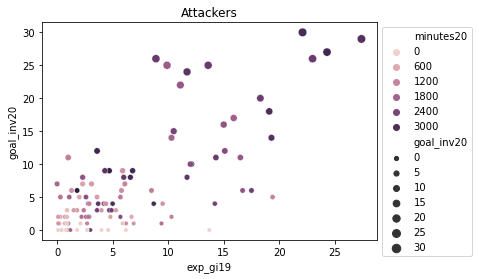

In [41]:
# create scatter plot of exp_gi and gi for attackers using seaborn
attacker_scatter = sns.scatterplot(data=attacker_stats, x='exp_gi19', y='goal_inv20', hue='minutes20', size='goal_inv20')
attacker_scatter.set_title("Attackers")
algd = attacker_scatter.legend(bbox_to_anchor=(1,1))
plt.savefig('attacker_scatter', bbox_extra_artists=(algd,), bbox_inches='tight')

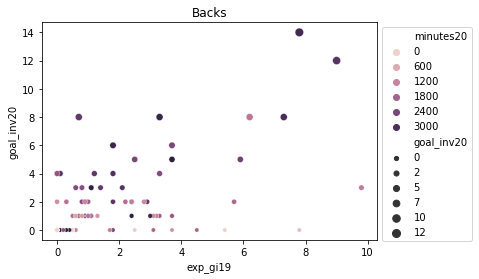

In [42]:
# create scatter plot of exp_gi and gi for backs using seaborn
backs_scatter = sns.scatterplot(data=backs_stats, x='exp_gi19', y='goal_inv20', hue='minutes20', size='goal_inv20')
backs_scatter.set_title("Backs")
blgd = backs_scatter.legend(bbox_to_anchor=(1,1))
plt.savefig('backs_scatter', bbox_extra_artists=(blgd,), bbox_inches='tight')

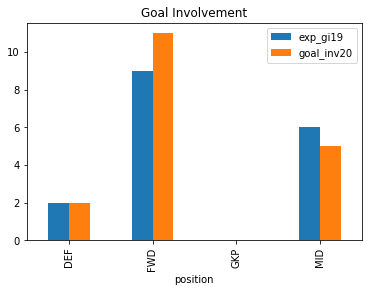

In [43]:
# create average by position data
average_by_position = complete_stats.groupby('position').mean().round(0)

# reset average by position index for bar chart
average_by_position = average_by_position.reset_index()

# create bar chart comparing expected goal involvement and goal involvement by position
gi_bar = average_by_position.plot(x=0, y=['exp_gi19', 'goal_inv20'], kind="bar")
gi_bar.set_title("Goal Involvement")
plt.savefig('gi_bar')

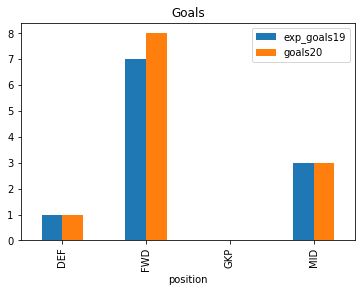

In [44]:
# create bar chart comparing expected goals and actual goals by position
goals_bar = average_by_position.plot(x=0, y=['exp_goals19', 'goals20'], kind="bar")
goals_bar.set_title("Goals")
plt.savefig('goals_bar')

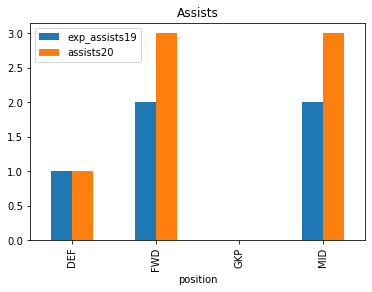

In [45]:
# create bar chart comparing expected assists and actual assists by position
assists_bar = average_by_position.plot(x=0, y=['exp_assists19', 'assists20'], kind="bar")
assists_bar.set_title("Assists")
plt.savefig('assists_bar')